# 비정상 절차서 21-01 : <font color=blue>PZR 압력 채널 BB-PT444 고장 ‘고’

1 경보 및 증상

2 자동 동작사항

3 긴급 조치사항 

4 후속 조치사항 ㅇ

## <font color=blue>1.0 데이터 처리

In [2]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
# with open('D:/CRONI_New_Interface/new_db_30mal/ab23_06_30004_(175).pkl', 'rb') as f:
with open('D:/이상현/9._.CNS_Platform(멀티 CNS 실행)/상현CNN/Data_pkl/ab21_01_166_(125).pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 'CPPRZL':deque(maxlen=5), 'PPRZ':deque(maxlen=5)}

## <font color=blue>2.0 경보 및 증상

### <font color=blue>2.1 PZR '고'압력 지시(BB-PI444)<font color=green> - 만족

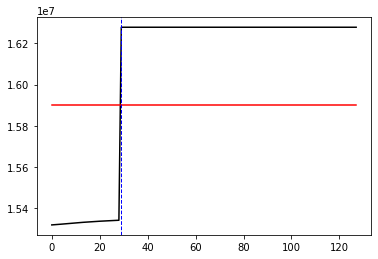

In [3]:
# ZINST58 : 가압기 압력 지시치
plt.plot(db['ZINST58']*98067, color='k') # -> 압력 증가 확인
plt.plot(db['CPPRZH'], color='r') # -> '고'압력 지시 확인

vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [149]:
PRZ_pre = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST58'][i]*98067 > db['CPPRZH'][i]:
            PRZ_pre.append(i+1)
if len(PRZ_pre) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 압력 "고" 지시 만족 시간 : {PRZ_pre[0]}초')

가압기 압력 "고" 지시 만족 시간 : 31초


### <font color=blue>2.2 PZR 살수밸브(BB-PV444C, 444D) 열림 지시(158.9㎏/㎠)<font color=green> - 만족

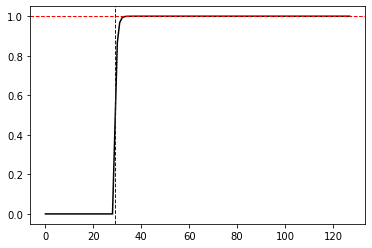

In [5]:
# BPRZSP : PZR 살수밸브 포지션
plt.plot(db['BPRZSP'], color='k') # -> PZR 살수밸브 포지션 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
hline = plt.axhline(1, color='r', linestyle='--', linewidth=1)

In [7]:
spray_valve = []
for i in range(len(db)):
    if i > 29:
        if db['BPRZSP'][i] > 0.99:
            spray_valve.append(i+1)
if len(spray_valve) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 살수 밸브 열림 지시 만족 시간 : {spray_valve[0]}초')
            

가압기 살수 밸브 열림 지시 만족 시간 : 33초


### <font color=blue>2.3 PZR 비례전열기 꺼짐(158.1㎏/㎠)<font color=green> - 만족

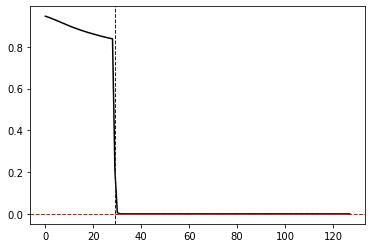

In [8]:
# QPRZH : 비례전열기 전원
plt.plot(db['QPRZH'], color='k') # -> 비례전열기 전원 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
hline = plt.axhline(0, color='r', linestyle='--', linewidth=1)

In [154]:
QPRZH_onoff = []
for i in range(len(db)):
    if i > 29:
        if db['QPRZH'][i] == 0:
            QPRZB_onoff.append(i+1)
if len(QPRZB_onoff) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'비례전열기 꺼짐 만족 시간 : {QPRZB_onoff[0]}초')

비례전열기 꺼짐 만족 시간 : 31초


### <font color=blue>2.4 PZR 보조전열기 꺼짐(158.1㎏/㎠)<font color=green> - 만족

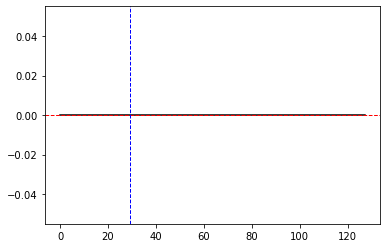

In [10]:
# QPRZB : 보조전열기 전원
plt.plot(db['QPRZB'], color='k') # -> 보조전열기 전원 확인
hline = plt.axhline(0, color='r', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)


In [157]:
QPRZH_onoff = []
for i in range(len(db)):
    if i > 29:
        if db['QPRZB'][i] == 0:
            QPRZH_onoff.append(i+1)
if len(QPRZH_onoff) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'비례전열기 꺼짐 만족 시간 : {QPRZH_onoff[0]}초')

비례전열기 꺼짐 만족 시간 : 31초


### <font color=blue>2.5 "PZR PRESS LOW"(BB-PT445) 경보 발생(153.7㎏/㎠) 및 PZR ‘저’ 압력 지시(BB-PI445, 455, 456, 457)<font color=green> - 만족

저 압력 지시가 실제 압력 지시인지 압력 지시계 지시인지 살짝 헷갈린다고 알림.

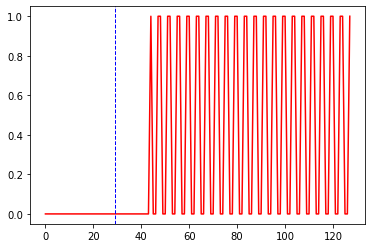

In [158]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
plt.plot(db['KLAMPO308'], color='r') #실제 압력

vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [159]:
PRZ_low_alr = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO308'][i] > 0:
            PRZ_low_alr.append(i+1)
if len(PRZ_low_alr) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f' "PZR PRESS LOW"(BB-PT445) 경보 발생 만족 시간 : {PRZ_low_alr[0]}초')

 "PZR PRESS LOW"(BB-PT445) 경보 발생 만족 시간 : 45초


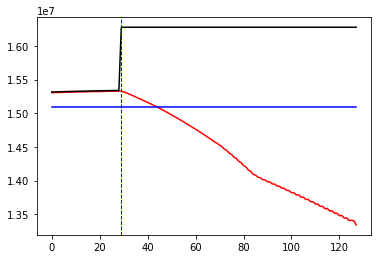

In [160]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
plt.plot(db['CPPRZL'], color='b') #저 압력 기준치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [161]:
PRZ_low_pre = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < db['CPPRZL'][i]:
            PRZ_low_pre.append(i+1)
if len(PRZ_low_pre) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 "저" 지시 만족 시간 : {PRZ_low_pre[0]}초')

가압기 "저" 지시 만족 시간 : 45초


### <font color=blue>2.6 "PZR LO PRESS INTERLOCK" 경보발생(153.6㎏/㎠) 및 PZR PORV 차단밸브(BB-HV005, 006, 007) 닫힘<font color=green> - 만족

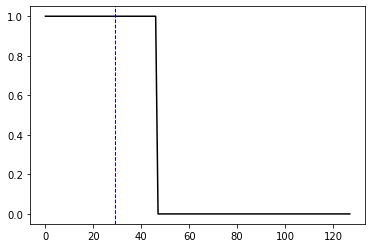

In [162]:
# BHV6 : PZR PORV 차단밸브
# "PZR LO PRESS INTERLOCK" 경보발생(153.6㎏/㎠) 없음
plt.plot(db['BHV6'], color='k') # -> PZR PORV 차단밸브 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

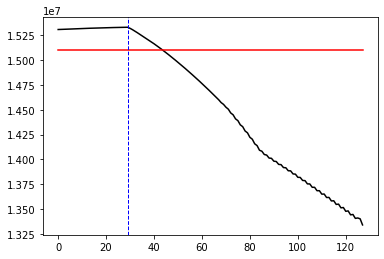

In [164]:
plt.plot(db['PPRZ'], color='k')
plt.plot(db['CPPRZL'], color='r')# -> PZR PORV 차단밸브 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [12]:
PZR_PRESS_LOW = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < db['CPPRZL'][1] and db['BHV6'][i] == 0:
            PZR_PRESS_LOW.append(i+1)
if len(PZR_PRESS_LOW) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'PZR PRESS LOW 경보 증상 및 가압기 PORV 차단 밸브 닫힘 만족 시간 : {PZR_PRESS_LOW[0]}초')

PZR PRESS LOW 경보 증상 및 가압기 PORV 차단 밸브 닫힘 만족 시간 : 48초


### <font color=blue>2.7 "PZR PRESS NOT HI(P-11)" 경보 발생(138.5㎏/㎠)<font color=green> - 만족

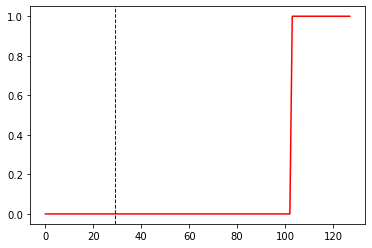

In [166]:
# KLAMPO216 = PERMISSIVE SIGNAL, P-11
plt.plot(db['KLAMPO216'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [167]:
P_11 = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO216'][i] == 1:
            P_11.append(i+1)
if len(P_11) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'P_11 경보 증상 만족 시간 : {P_11[0]}초')

P_11 경보 증상 만족 시간 : 104초


### <font color=blue>2.8 "PZR PRESS LOW ALERT" 경보 발생(136.8㎏/㎠) 및 Rx 트립 작동<font color=green> - 만족

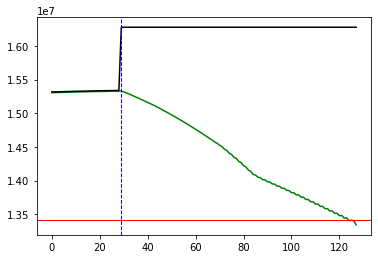

In [14]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='g') #실제 압력
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axhline(136.8*98067, color='r', linestyle='-', linewidth=1) 
# ㄹ "PZR PRESS LOW ALERT 경보 발생 기준"

vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [169]:
PRZ_low_trip = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 136.8*98067 and db['KRXTRIP'][i] == 1 :
            PRZ_low_trip.append(i+1)
if len(PRZ_low_trip) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f' Rx trip 만족 시간 : {PRZ_low_trip[0]}초')

 Rx trip 만족 시간 : 126초


### <font color=blue>2.9 "PZR PRESS LOW SI ALERT" 경보 발생(126.7㎏/㎠) 및 SI 작동<font color=red> - 불만족

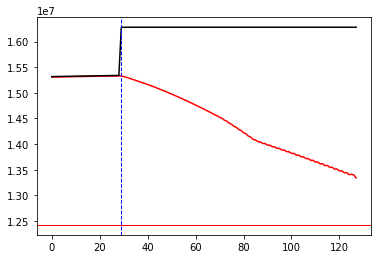

In [170]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(126.7*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

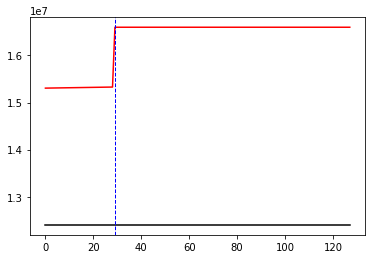

In [104]:
# PPRZN : 가압기 압력 (Narrow Range)
plt.plot(db['PPRZN'], color='r')
plt.plot(db['CSAFEI'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [115]:
pre_SI = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZN'][i] < db['CSAFEI'][i] :
            pre_SI.append(i+1)
if len(pre_SI) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'경보 및 SI 작동 만족 시간 : {pre_SI[0]}초')

증상을 만족하지 못했습니다.


## <font color=blue>3.0 자동 동작사항

### <font color=blue>3.1 PZR 전열기 모두 꺼짐(158.1㎏/㎠)<font color=green> - 만족

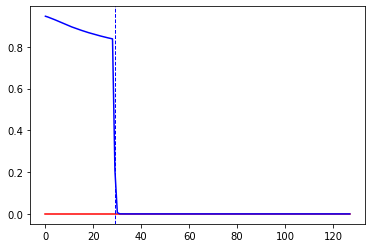

In [124]:
# QPRZB : 비례전열기 전원
# QPRZH : 보조전열기 전원
plt.plot(db['QPRZB'], color='r') # -> 비례전열기 전원 확인
plt.plot(db['QPRZH'], color='b') # -> 보조전열기 전원 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [127]:
QPRZ_onoff = []
for i in range(len(db)):
    if i > 29:
        if db['QPRZB'][i] < 0.2 and db['QPRZH'][i] < 0.2 :
            QPRZ_onoff.append(i+1)
if len(QPRZ_onoff) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'경보 및 SI 작동 만족 시간 : {QPRZ_onoff[0]}초')

경보 및 SI 작동 만족 시간 : 31초


### <font color=blue>3.2 PZR 살수밸브(BB-PV444C, 444D) 열림(158.9㎏/㎠)<font color=green> - 만족

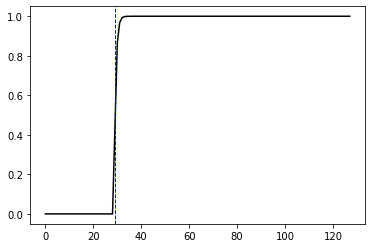

In [128]:
# BPRZSP : PZR 살수밸브 포지션
plt.plot(db['BPRZSP'], color='k') # -> PZR 살수밸브 포지션 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [129]:
auto_spray_valve = []
for i in range(len(db)):
    if i > 29:
        if db['BPRZSP'][i] > 0:
            auto_spray_valve.append(i+1)
if len(auto_spray_valve) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 살수 밸브 열림 지시 만족 시간 : {auto_spray_valve[0]}초')

가압기 살수 밸브 열림 지시 만족 시간 : 31초


### 3.4 Rx 트립(136.8㎏/㎠)<font color=green> - 만족

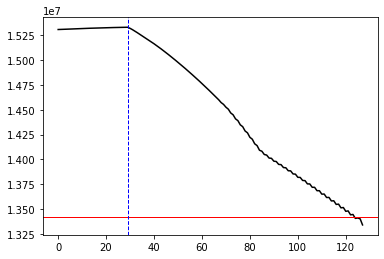

In [140]:
# BPRZSP : PZR 살수밸브 포지션
plt.plot(db['PPRZ'], color='k') # -> PZR 살수밸브 포지션 확인
vline = plt.axhline(13415497.2, color='r', linestyle='-', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [142]:
pre_RX = []
for i in range(len(db)):
    if i > 29:
        if db['KRXTRIP'][i] == 1 :
            pre_RX.append(i+1)
if len(pre_RX) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'경보 및 SI 작동 만족 시간 : {pre_RX[0]}초')

경보 및 SI 작동 만족 시간 : 126초


In [137]:
trip_set = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 13415497.2 :
            trip_set.append(i+1)
if len(trip_set) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'경보 및 SI 작동 만족 시간 : {trip_set[0]}초')

경보 및 SI 작동 만족 시간 : 125초


### <font color=blue>3.5 SI 작동(126.7㎏/㎠)<font color=red> - 불만족

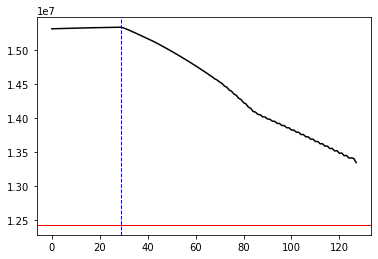

In [141]:
# BPRZSP : PZR 살수밸브 포지션
plt.plot(db['PPRZ'], color='k') # -> PZR 살수밸브 포지션 확인
vline = plt.axhline(12425025.55, color='r', linestyle='-', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [143]:
pre_SI = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO6'][i] == 1 :
            pre_SI.append(i+1)
if len(pre_SI) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'경보 및 SI 작동 만족 시간 : {pre_SI[0]}초')

증상을 만족하지 못했습니다.


In [146]:
trip_set = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 12425025.55 :
            trip_set.append(i+1)
if len(trip_set) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'경보 및 SI 작동 만족 시간 : {trip_set[0]}초')

증상을 만족하지 못했습니다.


## <font color=blue> 4.0 긴급 조치사항

### <font color=blue>4.1 PZR 압력 제어기 BB-PK444A를 수동으로 전환하여 압력을 조절한다. (동시확인)

### <font color=blue>4.2 PZR ‘고’ 압력에서 전열기가 켜져 있으면 전열기를 수동으로 꺼준다.

### <font color=blue>4.3 PZR 압력이 정상으로 유지되는지 확인한다.

### <font color=blue>4.4 PZR PORV(BB-PV444B, 445A, 445B)가 열리지 않도록 압력을 조절한다.